In [44]:
import pandas as pd
import numpy as np

data = {}
kolom = ['Kolom1', 'Kolom2', 'Kolom3', 'Kolom4', 'Kolom5', 'Kolom6', 'Kolom7', 'Kolom8', 'Kolom9', 'Kolom10', 'Kolom11', 'Kolom12', 'Kolom13']
for k in kolom:
    data[k] = np.random.randint(1, 100, size=300)
data['Target'] = np.random.choice([0, 1], size=300)
df = pd.DataFrame(data)
df

,Kolom1,Kolom2,Kolom3,Kolom4,Kolom5,Kolom6,Kolom7,Kolom8,Kolom9,Kolom10,Kolom11,Kolom12,Kolom13,Target
0,19,11,46,31,43,77,63,39,21,87,18,65,51,1
1,22,51,6,15,86,58,4,73,23,35,94,42,52,0
2,4,13,5,18,33,83,89,14,56,50,6,65,20,1
3,34,62,45,21,51,86,19,87,35,1,12,89,10,0
4,87,84,44,8,97,73,44,77,36,37,93,19,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,99,46,96,46,20,46,80,11,84,33,37,23,54,1
296,34,43,87,93,32,35,33,83,99,28,66,9,47,1
297,54,47,75,77,81,19,11,31,75,84,2,71,93,0
298,23,80,62,96,88,91,17,32,60,13,52,8,36,0


In [8]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Memisahkan fitur dan target
X = df.drop('Target', axis=1)
y = df['Target']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek SVM
model = svm.SVC()

# Melatih model SVM dengan data latih
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)


Akurasi: 0.5666666666666667


In [11]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

X = df.drop('Target', axis=1)
y = df['Target']
model = svm.SVC(kernel='linear', C=1.0)
scores = cross_val_score(model, X, y, cv=7)

print("Akurasi dari setiap fold:", scores)

print("Rata-rata akurasi:", scores.mean())

Akurasi dari setiap fold: [0.58139535 0.44186047 0.46511628 0.53488372 0.53488372 0.51162791
 0.61904762]
Rata-rata akurasi: 0.5269735801297263


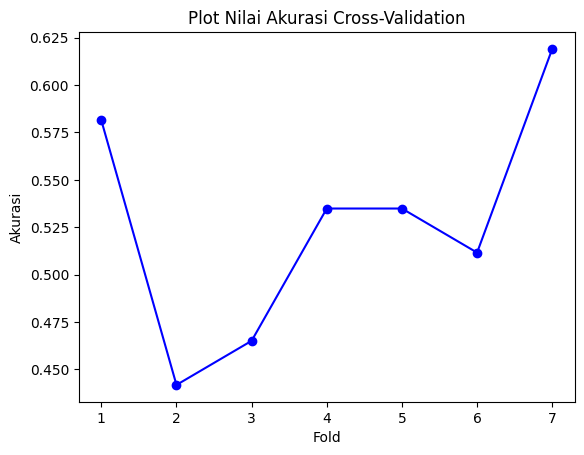

In [16]:
import matplotlib.pyplot as plt

# Menentukan jumlah fold
kfold = range(1, 8)

# Memplot hasil scores
plt.plot(kfold, scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Akurasi')
plt.title('Plot Nilai Akurasi Cross-Validation')
plt.xticks(kfold)
plt.show()

In [34]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from gaft import GAEngine
from gaft.components import BinaryIndividual, Population
from gaft.operators import RouletteWheelSelection, UniformCrossover, FlipBitMutation

# Memisahkan fitur dan target
X = df.drop('Target', axis=1)
y = df['Target']

# Normalisasi fitur menggunakan Min-Max Scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Jumlah kolom yang akan dipilih oleh GA
num_features = 5

# Fungsi evaluasi untuk GA (berdasarkan akurasi)
def fitness(indv):
    # Mengubah individu menjadi indeks kolom yang aktif
    selected_cols = np.where(indv == 1)[0]
    # Memilih fitur berdasarkan indeks kolom yang aktif
    X_selected = X_scaled[:, selected_cols]
    # Membuat model SVM
    model = svm.SVC()
    # Melakukan 5-fold cross-validation dengan fitur yang dipilih
    scores = cross_val_score(model, X_selected, y, cv=5)
    # Menghitung akurasi rata-rata
    accuracy = scores.mean()
    # Mengembalikan nilai akurasi sebagai fitness
    return accuracy

# Inisialisasi populasi GA dengan individu binary
indv_template = BinaryIndividual(ranges=[(0, 1)] * X.shape[1])
population = Population(indv_template=indv_template, size=50)

# Inisialisasi operator seleksi, crossover, dan mutasi
selection = RouletteWheelSelection()
crossover = UniformCrossover(pc=0.8, pe=0.5)
mutation = FlipBitMutation(pm=0.1)

# Inisialisasi engine GA dengan populasi, seleksi, crossover, dan mutasi
engine = GAEngine(population=population, selection=selection, crossover=crossover, mutation=mutation)

# Menentukan fungsi evaluasi sebelum menetapkan engine.fitness_function
engine.fitness_function = fitness

# Menentukan jumlah generasi
max_generations = 50

# Menjalankan GA
engine.run(ng=max_generations)

# Mendapatkan individu terbaik (hasil seleksi fitur)
best_indv = engine.population.best_indv(engine.fitness)
selected_cols = np.where(best_indv == 1)[0]
selected_features = X.columns[selected_cols]

# Menampilkan hasil rekomendasi fitur
print("Rekomendasi Fitur Terbaik:")
print(selected_features)

AttributeError: ignored

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
from deap import creator, base, tools, algorithms

# gantikan 'your_dataframe.csv' dengan file csv yang kamu miliki

X = df.iloc[:,:-1] # ambil semua kolom kecuali yang terakhir
y = df.iloc[:,-1]  # ambil kolom terakhir sebagai target

# pisahkan data menjadi set training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standarisasi data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# mengatur parameter GA
POP_SIZE = 100    # jumlah populasi
P_CROSSOVER = 0.7  # probabilitas crossover
P_MUTATION = 0.3   # probabilitas / tingkat mutasi
MAX_GENERATIONS = 50   # jumlah maksimum generasi
HALL_OF_FAME_SIZE = 10

# menyiapkan creator untuk mendefinisikan individu dan populasi fitness
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
# atribut generator
toolbox.register("attr_bool", np.random.choice, 2)
# inisialisasi struktur individu dan populasi
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(df.columns)-1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate_individual(individual):
    # ubah individu menjadi list boolean untuk digunakan sebagai mask
    mask = [bool(x) for x in individual]
    svm_clf = svm.SVC()
    svm_clf.fit(X_train[:, mask], y_train)
    predictions = svm_clf.predict(X_test[:, mask])
    return (metrics.accuracy_score(y_test, predictions),)

# operator genetik
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# mengatur haluan
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# statistik evolusi
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

# jalankan algoritma genetika
population, logbook = algorithms.eaSimple(toolbox.population(n=POP_SIZE),
                                          toolbox,
                                          cxpb=P_CROSSOVER,
                                          mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats,
                                          halloffame=hof,
                                          verbose=True)

# tampilkan fitur terpilih
best_individual = hof.items[0]
best_mask = [bool(x) for x in best_individual]
best_features = [column for column, include in zip(df.columns[:-1], best_mask) if include]

print("\nBest Features: ", best_features)

# tampilkan fitness terbaik
print("\nBest Fitness: ", best_individual.fitness.values[0])

# melatih ulang SVM dengan fitur terpilih dan hitung akurasi
svm_clf = svm.SVC()
svm_clf.fit(X_train[:, best_mask], y_train)
predictions = svm_clf.predict(X_test[:, best_mask])
accuracy = metrics.accuracy_score(y_test, predictions)
print("\nAccuracy with Best Features: ", accuracy)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	min     	max     
0  	100   	0.430167	0.283333	0.533333
1  	76    	0.4845  	0.35    	0.633333
2  	78    	0.507   	0.333333	0.633333
3  	88    	0.534   	0.383333	0.633333
4  	82    	0.542167	0.416667	0.633333
5  	76    	0.5545  	0.483333	0.633333
6  	80    	0.557167	0.4     	0.633333
7  	84    	0.560833	0.4     	0.633333
8  	78    	0.57    	0.433333	0.633333
9  	84    	0.5715  	0.45    	0.633333
10 	84    	0.585667	0.433333	0.633333
11 	73    	0.603167	0.416667	0.633333
12 	91    	0.617333	0.433333	0.633333
13 	72    	0.622   	0.5     	0.633333
14 	85    	0.603167	0.383333	0.633333
15 	71    	0.617167	0.5     	0.633333
16 	81    	0.6155  	0.45    	0.633333
17 	80    	0.614667	0.433333	0.633333
18 	88    	0.615167	0.4     	0.633333
19 	80    	0.614   	0.433333	0.633333
20 	79    	0.619167	0.433333	0.633333
21 	77    	0.617   	0.5     	0.633333
22 	78    	0.615667	0.483333	0.633333
23 	80    	0.616667	0.466667	0.633333
24 	82    	0.6205  	0.466667	0.633333
25 	80    	0